In [ ]:
import zipfile as zf

files = zf.ZipFile("/content/Baby-Machine-Data.zip",'r')
files.extractall()
files.close()

In [ ]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 3.3 MB/s 


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
import glob
from sklearn import tree
from scipy.stats import itemfreq
import mahotas as mt

In [ ]:
def extract_features(image):
	# calculate haralick texture features for 4 types of adjacency
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    textures = mt.features.haralick(gray)
	# take the mean of it and return it
    ht_mean  = textures.mean(axis=0)
    arr = np.float32(image)
    pixels = arr.reshape((-1, 3))
    n_colors = 3
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    _, labels, centroids = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
    palette = np.uint8(centroids)
    quantized = palette[labels.flatten()]
    quantized = quantized.reshape(image.shape)
    dominant_color = palette[np.argmax(itemfreq(labels)[:, -1])]
    feat = np.concatenate((ht_mean,dominant_color))
    return feat

In [ ]:
train_path = "/content/Baby Machine Data/ap-or-database/train"
train_names = os.listdir(train_path)

In [ ]:
train_features = []
train_labels = []

In [ ]:
for train_name in train_names:
  cur_path = train_path + "/" + train_name
  cur_label = train_name
  i  = 1
  for file in glob.glob(cur_path + "/*.jpg"):
    print ("Processing Image - {} in {}".format(i, cur_label))
    image = cv2.imread(file)
    features = extract_features(image)
    train_features.append(features)
    train_labels.append(cur_label)
    i += 1

Processing Image - 1 in orange


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  app.launch_new_instance()


Processing Image - 2 in orange
Processing Image - 3 in orange
Processing Image - 4 in orange
Processing Image - 5 in orange
Processing Image - 1 in apple
Processing Image - 2 in apple
Processing Image - 3 in apple


In [ ]:
# create the classifier
clf=tree.DecisionTreeClassifier()
# train the classifier
print ("Training model..")
clf.fit(train_features, train_labels)
# loop over the test images
test_path = ("/content/Baby Machine Data/ap-or-database/test")

Training model..


Prediction - apple


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  app.launch_new_instance()


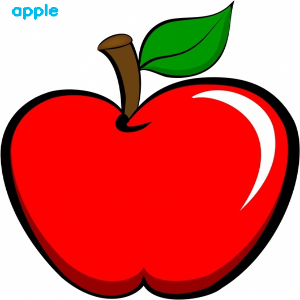

Prediction - apple


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  app.launch_new_instance()


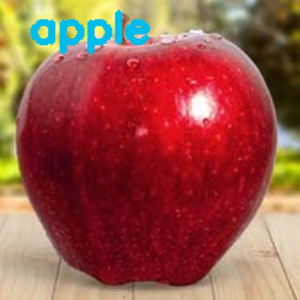

Prediction - apple


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  app.launch_new_instance()


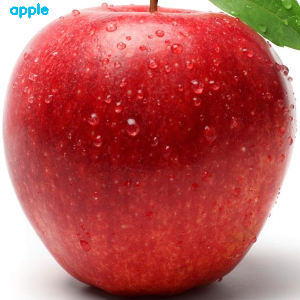

Prediction - apple


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  app.launch_new_instance()


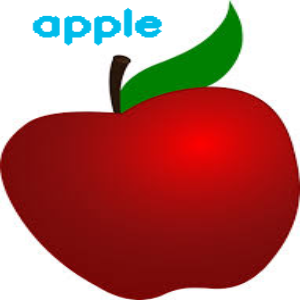

Prediction - orange


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  app.launch_new_instance()


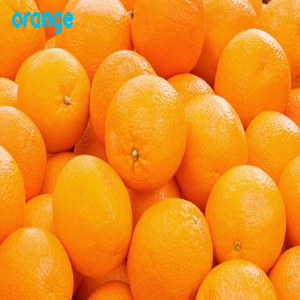

Prediction - orange


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  app.launch_new_instance()


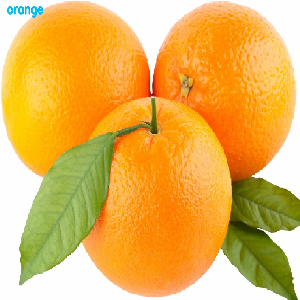

Prediction - orange


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  app.launch_new_instance()


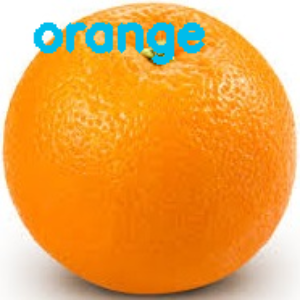

In [ ]:
for file in glob.glob(test_path + "/*.jpg"):
  # read the input image
  image = cv2.imread(file)
  # extract texture and color from the image
  features = extract_features(image)
  # evaluate the model and predict label
  prediction = clf.predict(features.reshape(1, -1))[0]
  # show the label
  cv2.putText(image, prediction, (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (235,188,0), 3)
  print ("Prediction - {}".format(prediction))
  image = cv2.resize(image, (300, 300))  # display the output image
  cv2_imshow(image)